# LDA ile En Uygun Topic Tespiti

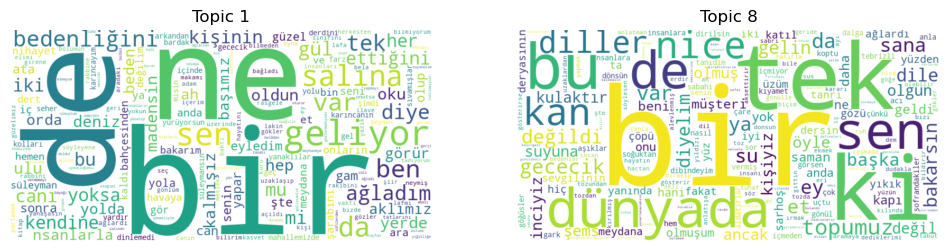

In [47]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Dosya adı
filename = "mevlana.txt"

# Dosyadaki metni oku
with open(filename, 'r', encoding='utf-8') as file:
    text_data = file.read()

# Metni satırlara ayır
text_lines = text_data.split('\n')

# Metni belgeler olarak tokenize et
documents = [word_tokenize(line) for line in text_lines]

# Bag of Words modelini oluştur
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(doc) for doc in documents])

# LDA modelini eğit
num_topics = 20
lda_model = LatentDirichletAllocation(n_components=num_topics)
lda_model.fit(X)

# Yeni belgeleri tokenize et
new_documents = ["ismin içinde ne var? başka isimle bir gül de aynı derecede tatlı kokar.",
                  "Eğer müzik aşkın gıdasıysa, çal."]

# Yeni belgeleri vektörlere dönüştür
X_new = vectorizer.transform(new_documents)

# Yeni belgeler üzerindeki konu tahminleri
topic_idx = lda_model.transform(X_new).argmax(axis=1) 

# WordCloud oluştur
def create_wordcloud(vectorizer, lda_model, topic_idx):
    feature_names = vectorizer.get_feature_names_out()
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(
        {feature_names[i]: lda_model.components_[topic_idx , i] for i in range(len(lda_model.components_[topic_idx ]))}
    )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

# WordCloud'ları göster
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
create_wordcloud(vectorizer, lda_model, topic_idx[0])
plt.title("Topic " + str(topic_idx[0]))

plt.subplot(1, 2, 2)
create_wordcloud(vectorizer, lda_model, topic_idx[1])
plt.title("Topic " + str(topic_idx[1]))

plt.show()



# Topik Olasılıkları

[0.71038363 0.00714286 0.00714286 0.16104494 0.00714286 0.00714286
 0.00714286 0.00714286 0.00714286 0.00714286 0.00714286 0.00714286
 0.00714286 0.00714286 0.00714286 0.00714286 0.00714286 0.00714286
 0.00714286 0.00714286]


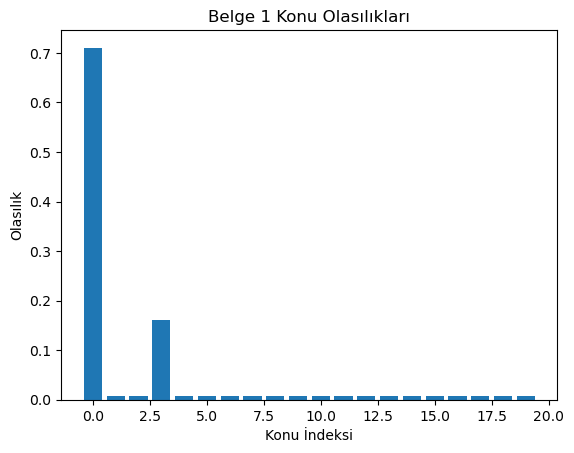

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize
import nltk

# Dosya adı
dosya_adı = "mevlana.txt"

# Dosyadaki metni oku
with open(dosya_adı, 'r', encoding='utf-8') as dosya:
    metin_verisi = dosya.read()

# Metni satırlara ayır
metin_satırları = metin_verisi.split('\n')

# Metni belgeler olarak tokenize et
belgeler = [word_tokenize(satır) for satır in metin_satırları]

# Bag of Words modelini oluştur
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(belge) for belge in belgeler])

# LDA modelini eğit
konu_sayısı = 20
lda_model = LatentDirichletAllocation(n_components=konu_sayısı, verbose=0)
lda_model.fit(X)

# Belge konu karışımlarını al
document_topic_probabilities = lda_model.transform(X)


document_topics = document_topic_probabilities[4]

print(document_topics)
plt.bar(range(konu_sayısı), document_topics)
plt.title("Belge 1 Konu Olasılıkları")
plt.xlabel("Konu İndeksi")
plt.ylabel("Olasılık")
plt.show()
